In [94]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy import stats

In [95]:
# HIDDEN 

def std_biv_norm_density(x, y, r):
    c = 1 - r**2
    return 1/(2*np.pi)*(c**0.5) * np.exp((-1/(2*c))*(x**2 -2*r*x*y + y**2))

def Plot_standard_bivariate_normal_density(r):
    x_limits = (-4, 4)
    y_limits = (-4, 4)
    def biv_norm(x, y):
        return std_biv_norm_density(x, y, r)
    f = biv_norm
    v = np.vectorize(f)
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection = '3d')
    x = np.linspace(*x_limits, 100)
    y = np.linspace(*y_limits, 100)
    X, Y = np.meshgrid(x, y)
    Z = v(X,Y)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.plot_surface(X, Y, Z, cstride=2, rstride=2)
    ax.set_zlabel('')
    r_round = round(r, 5)
    plt.title('Standard Bivariate Normal Density, Correlation = '+str(r_round))
    ax.view_init(20, -100)

def Plot_iid_standard_normal_density():
    Plot_standard_bivariate_normal_density(0)
    plt.ylabel('$Z$')

In [96]:
# HIDDEN

def sin(theta):
    return np.sin(theta * np.pi/180)
def cos(theta):
    return np.cos(theta * np.pi/180)
def tan(theta):
    return sin(theta)/cos(theta)

def projection_1_2(theta):
    x = 1
    z = 2
    y = x*cos(theta) + z*sin(theta)
    plt.figure(figsize=(6, 6))
    plt.scatter(x, z, s=40, color='green')
    plt.plot([-3, 3], [0, 0], color='grey', lw=2, label=r'$X$'+' axis')
    plt.plot([0, 0], [-3, 3], color='grey', lw=2)
    plt.plot([-3, 3], [tan(theta)*(-3), tan(theta)*3], color='gold', lw=2, label='New axis at positive angle '+r'$\theta$ to the '+r'$X$'+' axis')
    plt.plot([0, x], [0, 0], color='blue', lw=2)
    plt.plot([x, x], [0, z], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*y], [z, sin(theta)*y], color='green', linestyle='--', lw=2)
    plt.plot([0, cos(theta)*y], [0, sin(theta)*y], color='red', lw=2)         
    plt.axes().set_aspect('equal')
    plt.legend(bbox_to_anchor=(1.92, 1.02))
    plt.xlabel('$X$')
    plt.ylabel('$Z$', rotation=0)
    plt.title('Projection of $(X, Z) = (1, 2)$ on Gold Axis')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
def projection_trig():
    x = 1
    z = 2
    x1 = x*cos(theta)
    x2 = z*sin(theta)
    y = x1 + x2
    plt.figure(figsize=(8, 8))
    plt.scatter(x, z, s=40, color='green')
    plt.plot([-3, 3], [0, 0], color='grey', lw=2)
    plt.plot([0, 0], [-3, 3], color='grey', lw=2)
    plt.plot([-3, 3], [tan(theta)*(-3), tan(theta)*3], color='gold', lw=2)
    plt.plot([0, x], [0, 0], color='blue', lw=2)
    plt.plot([x, x], [0, z], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*y], [z, sin(theta)*y], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*x1], [0, sin(theta)*x1], color='k', linestyle='--', lw=2)
    plt.plot([cos(theta)*y, x+cos(theta)*x2], [sin(theta)*y, sin(theta)*x2], color='k', linestyle='--', lw=2)
    plt.plot([x, x+cos(theta)*x2], [0, sin(theta)*x2], color='k', linestyle='--', lw=2)
    plt.plot([0, cos(theta)*x1], [0, sin(theta)*x1], color='brown', lw=3, label='Length = '+r'$X\cos(\theta)$')
    plt.plot([cos(theta)*x1, cos(theta)*y], [sin(theta)*x1, sin(theta)*y], color='darkblue', lw=3, label='Length = '+r'$Z\sin(\theta)$')
    plt.text(0.3, 0.06, r'$\theta$', fontsize=20)
    plt.text(1.03, 1.6, r'$\theta$', fontsize=20)
    plt.text(0.8, 2.1, r'$(X, Z)$', fontsize=15)
    plt.legend(bbox_to_anchor=(1.35, 1))
    plt.axes().set_aspect('equal')
    plt.xlabel('$X$')
    plt.ylabel('$Z$', rotation=0)
    plt.title('$Y =$ '+r'$X\cos(\theta) + Z\sin(\theta)$')
    plt.xlim(-0.5, 3)
    plt.ylim(-0.5, 3)

### Independence and Angles ###
In this section we take a closer look at how correlation can be interpreted geometrically in terms of angles. 

We have defined $X$ and $Y$ to have the standard bivariate normal density with correlation $\rho$ if

$$
Y ~ = ~ \rho X + \sqrt{1 - \rho^2} Z
$$

where $X$ and $Z$ are i.i.d. standard normal. We showed that $Y$ is also standard normal, and that the conditional density of $Y$ given $X = x$ is normal $(\rho x, 1 - \rho^2)$. 

Note that we are assuming that $\rho$ is neither $1$ nor $-1$, so that the conditional density is not degenerate.

### Bivariate Normal Joint Density ###
The joint density of $Y$ is the product of the marginal density of $X$ and the conditional density of $Y$ given $X$. That is,

\begin{align*}
f(x, y) ~ &= ~ f_X(x)f_{Y \mid X=x} (y) \\ \\
&= ~ \frac{1}{\sqrt{2\pi}} \exp \Big{(}-\frac{1}{2} x^2\Big{)} \frac{1}{\sqrt{2\pi}\sqrt{1-\rho^2}} \exp \Big{(} -\frac{1}{2(1-\rho^2)} (y - \rho x)^2 \Big{)} \\ \\
&= ~ \frac{1}{2\pi \sqrt{1 - \rho^2}} \exp \Big{(} -\frac{1}{2(1-\rho^2)} (x^2 - 2\rho xy + y^2) \Big{)}
\end{align*}

by algebraic simplification. There is no need to learn this formula for applications; just remember the marginal and conditional densities used to derive it. 

Here we will use the joint density to observe some important properties of bivariate normal variables.

The graph below shows the joint density surface when $\rho = 0.8$. You can see that it has elliptical contours, consistent with the elliptical scatter plots we got in the previous sections by generating points $(X, Y)$.

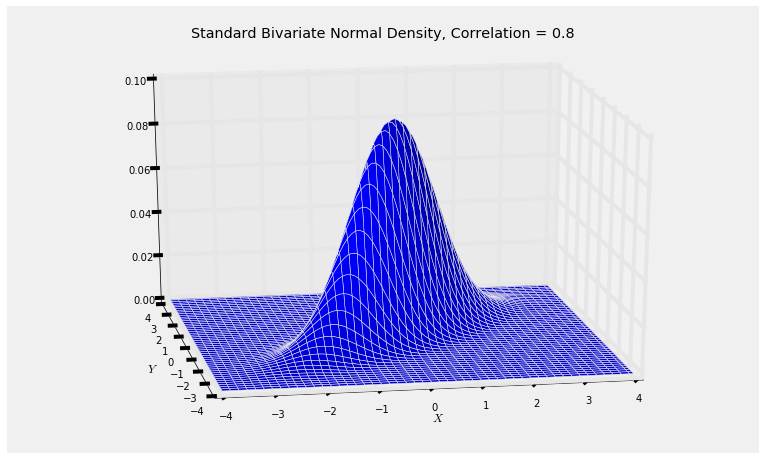

In [97]:
rho = 0.8
Plot_standard_bivariate_normal_density(rho)

Run the cell a few times with different values of $\rho$ in $(-1, 1)$ and notice how the surface changes. As the magnitude of $\rho$ gets smaller, the surface looks more like a bell with circular contours.

### Uncorrelated Bivariate Normal Variables are Independent ###
You know that in general, uncorrelated random variables need not be independent. But uncorrelated bivariate normal variables *are* independent, as you can see in several ways. 

Suppose $\rho = 0$. Then $X$ and $Y$ are independent, for any of the reasons listed below.

- By the definition of $Y$, we get $Y = Z$ which is independent of $X$.
- For every $x$, the conditional distribution of $Y$ given $X = x$ is normal $(0, 1)$, which doesn't involve $x$.
- The joint density of $X$ and $Y$ is
$$
f(x, y) ~ = ~ \frac{1}{2\pi} \exp \big{(} -\frac{1}{2} (x^2 + y^2) \big{)}
~ = ~ \frac{1}{\sqrt{2\pi}} \exp \big{(} -\frac{1}{2} x^2 \big{)} \cdot \frac{1}{\sqrt{2\pi}} \exp \big{(} -\frac{1}{2} y^2 \big{)}
~ = ~ f_X(x)f_Y(y)
$$

Establishing the independence of two random variables is not necessarily a simple task, but in the case of two *bivariate normal* random variables it is very simple indeed: just find the covariance between the two variables. If the covariance is zero, then the random variables are independent. If the covariance is not zero, then the random variables are dependent.

### Correlation as a Cosine ###
Everything we have said above follows from the definition 

$$
Y ~ = ~ \rho X + \sqrt{1 - \rho^2} Z
$$
where $X$ and $Z$ are i.i.d. standard normal.

Let's see where this comes from. A good place to start is the joint density of $X$ and $Z$, which has circular symmetry.

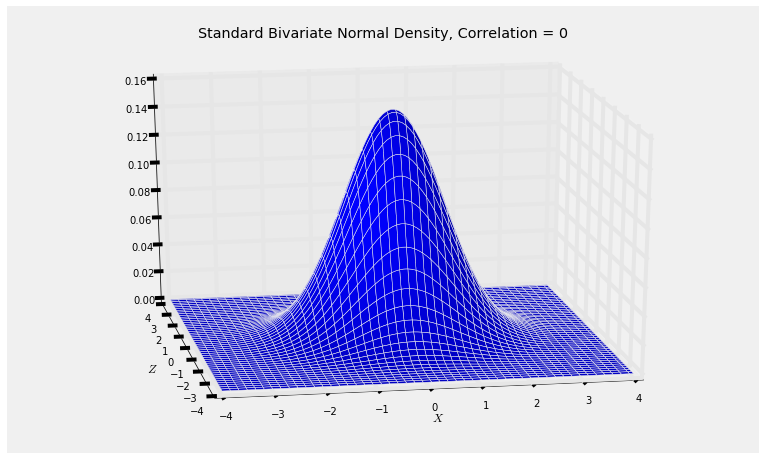

In [98]:
# HIDDEN
Plot_iid_standard_normal_density()

The $X$ and $Z$ axes are orthogonal. Let's see what happens if we twist them. 

Take any positive angle $\theta$ and draw a new axis at angle $\theta$ to the original $X$ axis. Every point $(X, Z)$ has a *projection* onto this axis. The figure below shows the projection of the point $(X, Z) = (1, 2)$ onto the gold axis which is at an angle of $\theta$ degress to the $X$ axis. The blue segment is the value of $X$. You get that by dropping the perpendicular from $(1, 2)$ to the horizontal axis. That's called *projecting* $(1, 2)$ onto the horizontal axis. The red segment is the projection of $(1, 2)$ onto the gold axes, obtained by dropping the perpendicular from $(1, 2)$ to the gold axis.

Vary the values of $\theta$ in the cell below to see how the projection changes as the gold axis rotates.

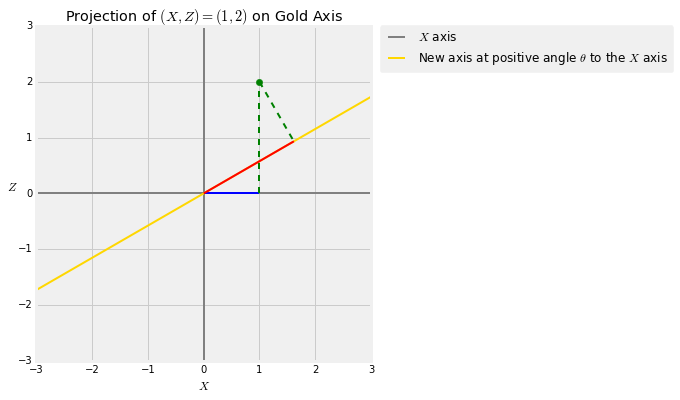

In [99]:
theta = 30
projection_1_2(30)

Let $Y$ be the length of the red segment, and remember that $X$ is the length of the blue segment. When $\theta$ is very small, $Y$ is almost equal to $X$. When $\theta$ approaches 90 degrees, $Y$ is almost equal to $Z$.

A little trigonometry shows that $Y ~ = ~ X \cos(\theta) + Z\sin(\theta)$.

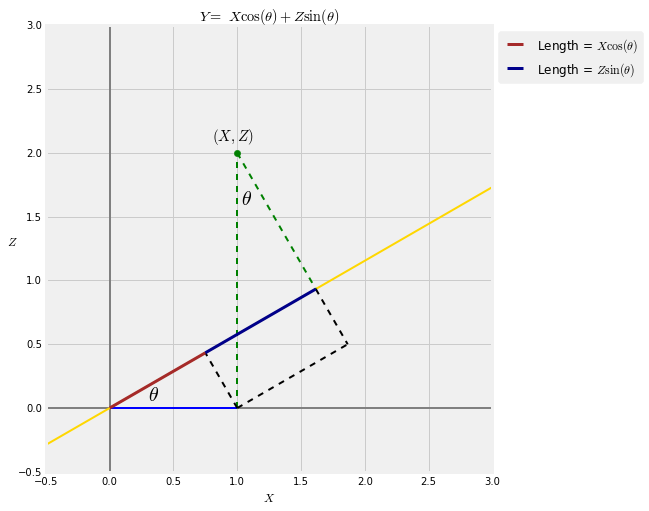

In [100]:
projection_trig()

Thus
$$
Y ~ = ~ X\cos(\theta) + Z\sin(\theta) ~ = ~ \rho X + \sqrt{1 - \rho^2}Z
$$
where $\rho = \cos(\theta)$.

The graphs below illustrate the transformation for $\theta = 30$ degrees.

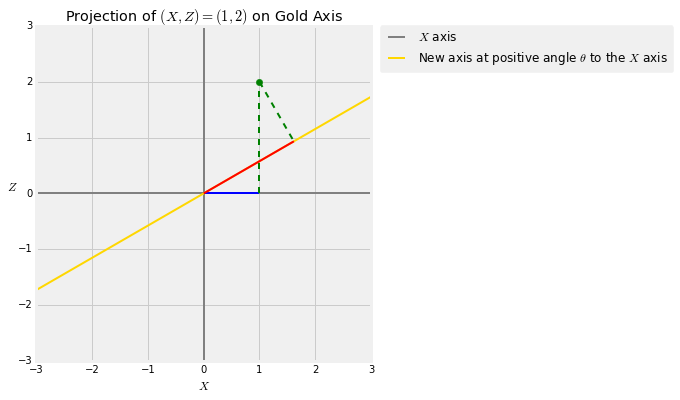

In [101]:
theta = 30
projection_1_2(theta)

The bivariate normal distribution is the joint distribution of the blue and red lengths $X$ and $Y$ when the original point $(X, Z)$ has i.i.d. standard normal coordinates. This transforms the circular contours of the joint density surface of $(X, Z)$ into the elliptical contours of the joint density surface of $(X, Y)$. 

In [102]:
cos(theta), (3**0.5)/2

(0.86602540378443871, 0.8660254037844386)

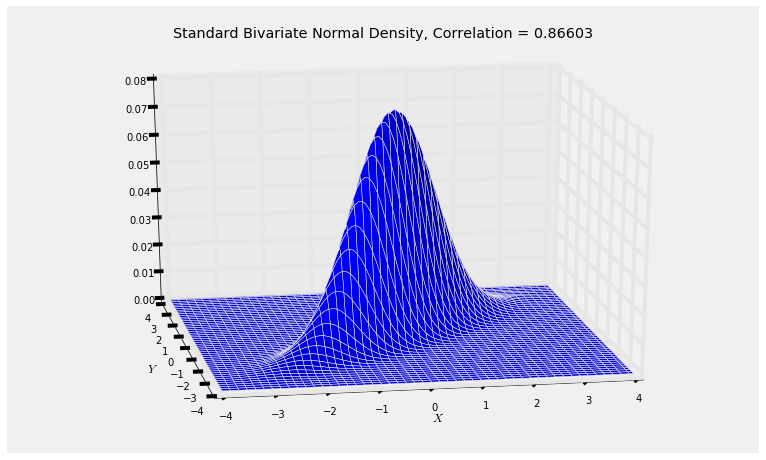

In [103]:
rho = cos(theta)
Plot_standard_bivariate_normal_density(rho)

### Small $\theta$ ###

When $\theta$ is very small, there is hardly any change in the position of the axis, and so $X$ and $Y$ are almost equal. 

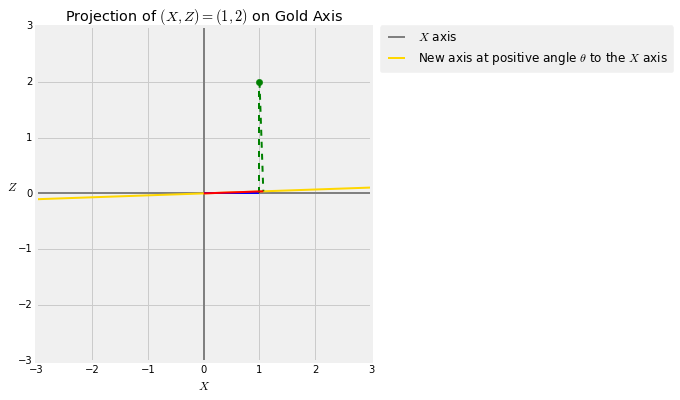

In [104]:
theta = 2
projection_1_2(theta)

The bivariate normal density of $X$ and $Y$, therefore, is essentially confined to the $X = Y$ line. The correlation $\cos(\theta)$ is large because $\theta$ is small; it is more than 0.999. 

You can see the plotting function having trouble rendering this joint density surface.

In [105]:
rho = cos(theta)
rho

0.99939082701909576

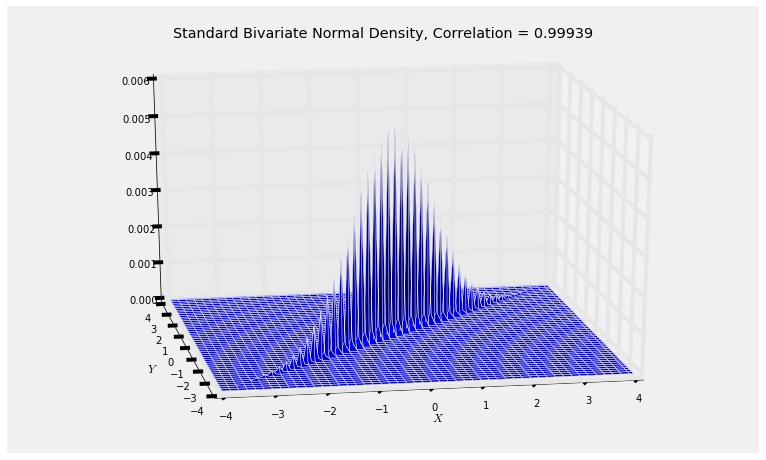

In [106]:
Plot_standard_bivariate_normal_density(rho)

### Orthogonality and Independence ###
When $\theta$ is 90 degrees, the gold axis is orthogonal to the $X$ axis and $Y$ is equal to $Z$ which is independent of $X$.

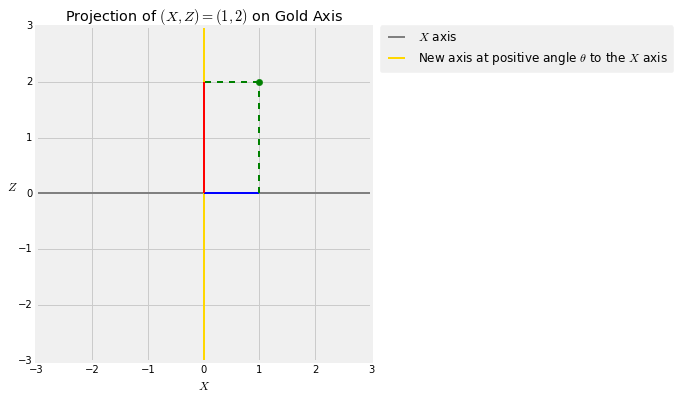

In [107]:
theta = 90
projection_1_2(theta)

When $\theta = 90$ degrees, $\cos(\theta) = 0$. The joint density surface of $(X, Y)$ is the same as that of $(X, Z)$ and has circular symmetry.

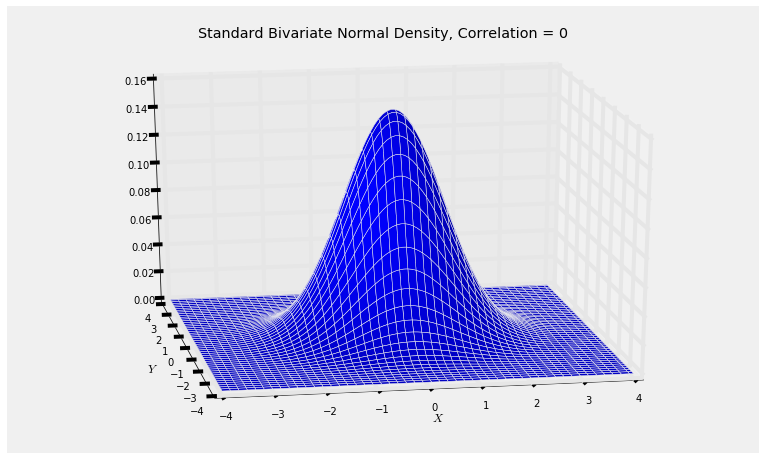

In [108]:
Plot_standard_bivariate_normal_density(0)